# Caja con lados a diferentes potenciales.

Queremos resolver el potencial de una caja cuyas paredes son conductoras (pero aisladas entre si) y pueden admitir potenciales arbitrarios (lógicamente constantes en cada una de ellas).
Por la posibilidad de superponer soluciones es suficiente considerar que todas las caras, excepto una están a potencial cero, la restante a potencial 1. La solución general será la combinación lineal arbitraria de soluciones con distintas caras a potencial unidad.

Consideraremos el caso donde el potencial distinto de cero es en la cara $z$ de la derecha. Consideraremos que la caja tiene dimensiones $(a,b,c)$.



Primero cargamos las librerías necesarias de Python

In [1]:
%matplotlib inline
#%matplotlib notebook
from sympy import *
from sympy import sin, cos, pi, sinh
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy.abc import x, y, z
a, b, c= symbols('a b c')
k, m, n = symbols('k m n', integer=True)
potential = symbols('potential', cls=Function)

Definimos las dimensiones de la caja:

In [22]:
a=1
b=1
c=1


El potencial estará dado por una suma infinita de soluciones armónicas del potencial en el interior de la caja. Las que corresponden al problema particular (todos los potenciales nulos excepto en $z=c$ son de la forma:


$$
\sin(\pi n x /a) \sin(\pi m y / b) \sinh(\pi \gamma(n,m) z),
$$

donde 
$$
\gamma(n,m) = \pi\sqrt{(n/a)^2 + (m/b)^2}
$$

La solución general tendrá entonces la forma:

$$
\phi(x,y,z)=\sum_{n=1}^{\infty} A_{nm} \sin(\pi n x /a) \sin(\pi m y / b) \sinh(\pi \gamma(n,m) z).
$$

Donde ya hemos impuesto todas las condiciones de contorno homogéneas. La inhomogénea se calcula ahora haciendo:

$$
\phi(x,y,c)=1
$$

Usando la ortogonalidad de los senos obtenemos:

$$
A_{nm} = 4\frac{\int_0^a \sin(\pi n x/a) dx \cdot \int_0^b \sin(\pi m y/b) dy}{\sinh(\pi \gamma(n,m) c)}
$$

Definimos entonces:

In [23]:
gamma_z=lambda n,m : pi*sqrt(n**2/a**2 + m**2/b**2)


In [24]:
A=lambda n,m: 4*Integral(sin(pi*x*n/a),(x,0,a)) * Integral(sin(pi*y*m/b),(y,0,b)) / sinh(gamma_z(n,m)*c)

In [25]:
gamma_z(3,4).doit()

5.0*pi

In [26]:
A(3,3).doit()

16/(9*pi**2*sinh(4.24264068711928*pi))

A los fines de graficar la solución tomaremos un número finito de términos en la serie:

In [27]:
L=50

Generamos la función potencial:

In [28]:
potential = lambdify((x,y,z),Sum(
    Sum(A(m,k).doit()*sin(pi*m*x/a)*sin(pi*k*y/b)*sinh(gamma_z(m,k)*z),(m,1,L)),(k,1,L))/a/b,"numpy")

In [29]:
potential(0.1,b/2,2.9)

9.075124256538535e+175

Chequeamos que satisface las condiciones de contorno (miramos a la mitad de la caja, ($y=b/2), se pueden probar otros valores y se pueden probar más o menos términos de la iteración.

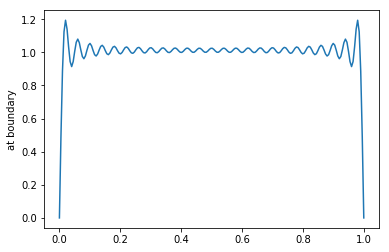

In [30]:
x_vals = np.linspace(0, a, 200)
#y_vals = linspace(0, b, 200)
#X,Y = meshgrid(x_vals,y_vals)
z_vals = potential(x_vals,b/2,c)
mpl.plot(x_vals, z_vals)
mpl.ylabel("at boundary")
mpl.show()

Una vez que se ha chequeado la condición de contorno graficamos ahora la aproximación obtenida:

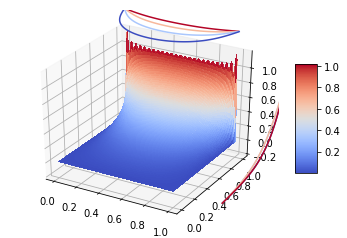

In [31]:
z_vals = np.linspace(0, c, 200)
X,Y = np.meshgrid(x_vals,z_vals)
p_vals = potential(X,b/2,Y)
fig = mpl.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-0.2, 1.2)
surf = ax.plot_surface(X,Y,p_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = np.arange(0., 1., 0.2)
levels_y = np.arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, p_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, p_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, p_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()